## Decision Tree Classification on the Wine Dataset

Decision trees partition the feature space into a set of simple decision rules.  In this notebook we classify wine cultivars based on thirteen chemical measurements.


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



Class distribution:
1    71
0    59
2    48
Name: cultivar, dtype: int64
Accuracy: 0.963

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



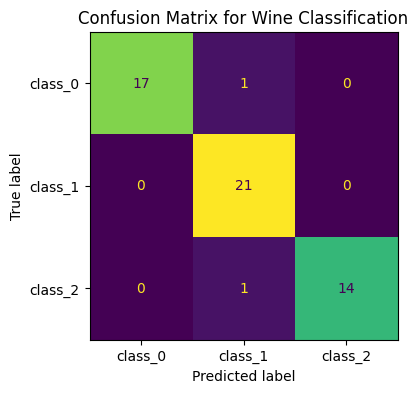

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

%matplotlib inline

# Load the wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='cultivar')

display(X.head())
print()  # Blank line for readability
print('Class distribution:')
print(y.value_counts())

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print()  # Blank line for readability
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Confusion matrix
fig, ax = plt.subplots(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=wine.target_names, ax=ax, colorbar=False)
plt.title('Confusion Matrix for Wine Classification')
plt.show()


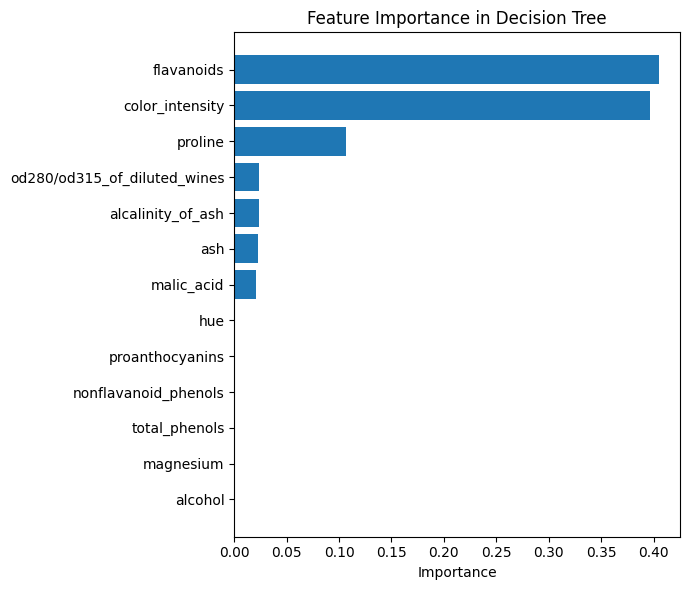

In [2]:
# Feature importance plot
importances = clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(7, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.tight_layout()
plt.show()


### Interpretation

The decision tree achieves strong performance on the wine dataset.  The **feature importance** chart reveals which chemical properties most influence cultivar classification.  For example, **flavanoids** and **proline** are among the top predictors.

In a commercial setting, such insights enable wine producers to focus on key chemical profiles that define premium varieties.  The interpretability of decision trees also makes them attractive for regulatory compliance or for communicating decisions to non‑technical stakeholders.
